обработка данных

In [825]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', 
                   sep=';',
                  parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

<Axes: xlabel='driver_score', ylabel='percentage'>

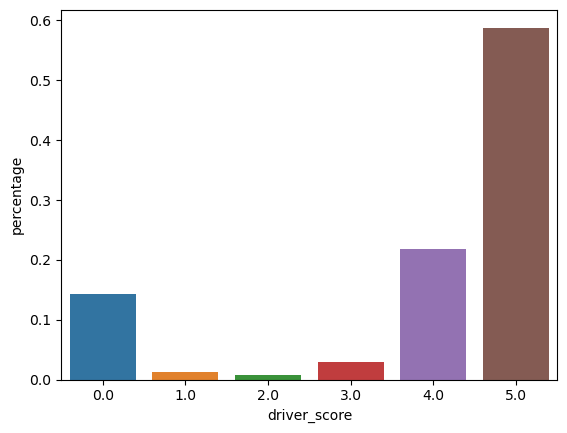

In [26]:
driver_score = pd.DataFrame(taxi['driver_score']\
    .value_counts(normalize=True))\
    .reset_index()\
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'})\
    .sort_values(by='driver_score')
sns.barplot(data=driver_score, x='driver_score', y='percentage')


<Axes: xlabel='rider_score', ylabel='percentage'>

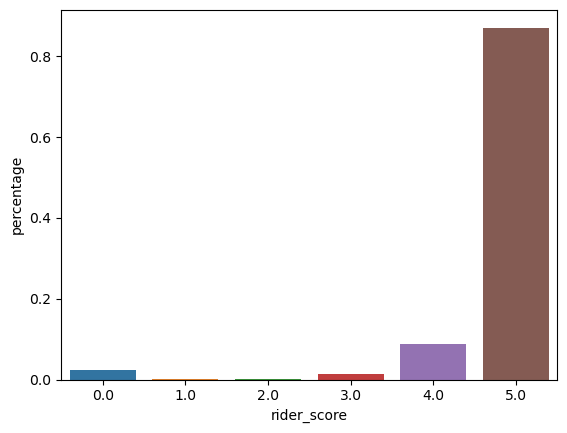

In [25]:
rider_score = pd.DataFrame(taxi['rider_score']\
    .value_counts(normalize=True))\
    .reset_index()\
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'})\
    .sort_values(by='rider_score')
sns.barplot(data=rider_score, x='rider_score', y='percentage')


In [37]:
user_data=pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [102]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [144]:
df = user_data.merge(logs, how='inner')
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


<Axes: xlabel='age', ylabel='success'>

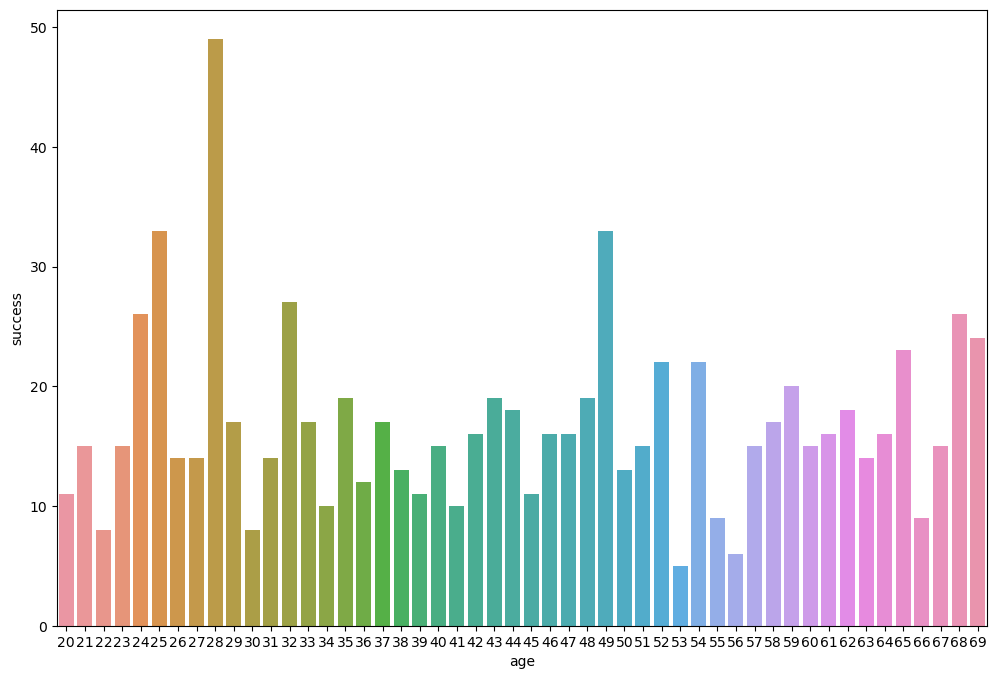

In [168]:
a = df.query('platform=="computer"').groupby('age', as_index=False).agg({'success': 'sum'})

plt.figure(figsize=(12,8))
sns.barplot(x=a.age, y=a.success)

In [821]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/802033/students.csv')
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.rename(columns={'Growth': 'Height'}, inplace=True)
df.columns = df.columns.str.lower()
df.rename(columns={'your_insitute': 'your_institute'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          186 non-null    int64  
 1   height                       186 non-null    int64  
 2   shoe_size                    186 non-null    int64  
 3   course_number                186 non-null    int64  
 4   year_of_birth                186 non-null    int64  
 5   friend_number                186 non-null    int64  
 6   russian_rating               186 non-null    int64  
 7   maths_rating                 186 non-null    int64  
 8   physics_rating               186 non-null    int64  
 9   computer_science_rating      186 non-null    int64  
 10  chemistry_rating             186 non-null    int64  
 11  literature_rating            186 non-null    int64  
 12  history_rating               186 non-null    int64  
 13  geography_rating    

In [649]:
# задача классификации

df1 = df[['weight', 'shoe_size']]
df1 = df1.dropna()

kmeans = KMeans(n_clusters=2, random_state=1, n_init=10)
kmeans.fit(df1)
df1['label'] = kmeans.labels_
df1.label.value_counts()

0    118
1     39
Name: label, dtype: int64

In [822]:
df_test = pd.read_csv('https://stepik.org/media/attachments/lesson/802417/students_test.csv')
df_test.columns = df_test.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.replace('-', '_')
df_test.rename(columns={'Growth': 'Height'}, inplace=True)
df_test.columns = df_test.columns.str.lower()
df_test.rename(columns={'your_insitute': 'your_institute'}, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          98 non-null     int64  
 1   height                       98 non-null     float64
 2   shoe_size                    98 non-null     float64
 3   course_number                98 non-null     int64  
 4   year_of_birth                98 non-null     int64  
 5   friend_number                98 non-null     int64  
 6   russian_rating               98 non-null     int64  
 7   maths_rating                 98 non-null     int64  
 8   physics_rating               98 non-null     int64  
 9   computer_science_rating      98 non-null     int64  
 10  chemistry_rating             98 non-null     int64  
 11  literature_rating            98 non-null     int64  
 12  history_rating               98 non-null     int64  
 13  geography_rating      

In [651]:
df_cut = df[['age', 'year_of_birth', 'month_of_birthday']]

X = df_cut.drop(columns='age')
y = df_cut.age

X_test = df_test[['year_of_birth', 'month_of_birthday']]

lr = LinearRegression().fit(X, y=y)
y_predicted = lr.predict(X_test)

mean_absolute_error(df_test['age'], y_predicted)

1.6054960000660925

In [680]:
df1 = df[['hair_length', 'shoe_size', 'sex']]

X_train = df1.drop(columns='sex')
y_train = df1.sex

X_test = df_test[['hair_length', 'shoe_size']]

scaler = StandardScaler()
scaler.fit(X_train)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [682]:
pd.crosstab(df_test['sex'].values, y_pred)

col_0,женский,мужской
row_0,,
женский,61,1
мужской,1,35


In [683]:
sgd = SGDClassifier(random_state=0)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

pd.crosstab(df_test['sex'].values, y_pred)

col_0,женский,мужской
row_0,,
женский,52,10
мужской,1,35


In [704]:
df1 = df[['year_of_birth', 'month_of_birthday', 'age']]

X_train = df1.drop(columns='age')
y_train = df1.age

X_test = df_test[['year_of_birth', 'month_of_birthday']]

dt = DecisionTreeRegressor(random_state=0, max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mean_absolute_error(df_test['age'], y_pred)

#sk.metrics.precision_recall_fscore_support(df_test['sex'].values, y_pred)

0.7241329318612689

In [735]:
rf = GradientBoostingClassifier(random_state=0)
rf.fit(df.iloc[:, 6:17].values.reshape(-1, 11), 
       df['your_institute'].values)

df_test['predicted'] = rf.predict(df_test.iloc[:, 6:17].values.reshape(-1, 11))

pd.crosstab(df_test['predicted'], df_test['your_institute'])

your_institute,Другое,Естественный (биология-химия-физика-технари),Математический и ИТ,Педагогический,СоцГум,Экономический,Юридический
predicted,,,,,,,
Другое,1,3,0,2,1,0,0
Естественный (биология-химия-физика-технари),3,10,0,2,0,0,0
Математический и ИТ,1,7,30,2,0,8,0
Педагогический,1,3,2,1,1,2,0
СоцГум,0,0,2,0,7,0,0
Экономический,1,0,2,1,0,3,1
Юридический,0,0,0,0,0,0,1


In [819]:
df_train = df[['height', 'weight', 'sex']]
df_train = df_train.dropna()

model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_train[['height', 'weight']], df_train['sex'])
X_test = df_test[['height', 'weight']]
X_test = X_test.dropna()
y_pred = model.predict(X_test)
pred = pd.DataFrame(model.predict_proba(X_test))
X_test = X_test.reset_index().drop(columns='index')
X_test = pd.concat([X_test, pred], axis=1)
X_test = X_test.rename(columns={1: 'pred_1', 0: 'pred_0'})
X_test.sort_values(by='pred_0', ascending=False)

,height,weight,pred_0,pred_1
52,162.0,49.0,0.943150,0.056850
65,162.0,49.0,0.943150,0.056850
15,159.0,49.0,0.943150,0.056850
44,160.0,50.0,0.943080,0.056920
33,157.0,49.0,0.941509,0.058491
...,...,...,...,...
48,186.0,100.0,0.085050,0.914950
29,196.0,97.0,0.085050,0.914950
24,193.0,105.0,0.085050,0.914950
20,194.0,97.0,0.085050,0.914950


In [840]:
le = LabelEncoder()
for column in df.columns:
    le.fit(df[column])
    df[column] = le.transform(df[column])

for column in df.columns:
    le.fit(df_test[column])
    df_test[column] = le.transform(df_test[column])    
    
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          98 non-null     int64
 1   height                       98 non-null     int64
 2   shoe_size                    98 non-null     int64
 3   course_number                98 non-null     int64
 4   year_of_birth                98 non-null     int64
 5   friend_number                98 non-null     int64
 6   russian_rating               98 non-null     int64
 7   maths_rating                 98 non-null     int64
 8   physics_rating               98 non-null     int64
 9   computer_science_rating      98 non-null     int64
 10  chemistry_rating             98 non-null     int64
 11  literature_rating            98 non-null     int64
 12  history_rating               98 non-null     int64
 13  geography_rating             98 non-null     int64
 

In [848]:
X_train = df.drop(columns='your_institute')
y_train = df.your_institute

X_test = df_test.drop(columns='your_institute')
y_test = df_test.your_institute

clf = DecisionTreeClassifier(random_state=0)
result = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

selector=ExtraTreesClassifier()
result=selector.fit(df[df.columns], df['your_institute'])
pd.DataFrame(result.feature_importances_, index=df.columns, columns=['importance']).sort_values(ascending=False)

,importance
age,0.014300
height,0.016176
shoe_size,0.017236
course_number,0.009669
year_of_birth,0.012141
friend_number,0.015608
russian_rating,0.013565
maths_rating,0.057521
physics_rating,0.011089
computer_science_rating,0.058193
